In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_theme()
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('cardata.csv')
df['date'] = pd.to_datetime(df['year'].astype('str') + '-' + df['month'].astype('str'))

In [3]:
# What category do we have
print(df['vehicle type'].value_counts())
print(df['fuel type'].value_counts())
print(df['geo'].value_counts())
print('Data is between : ',df['date'].dt.date.min(), 'and', df['date'].dt.date.max())

vehicle type
Multi-purpose vehicles    1344
Passenger cars            1344
Pickup trucks             1344
Vans                      1344
Name: count, dtype: int64
fuel type
Battery electric           896
Diesel                     896
Gasoline                   896
Hybrid electric            896
Other fuel types           896
Plug-in hybrid electric    896
Name: count, dtype: int64
geo
British Columbia and the Territories    672
Manitoba                                672
New Brunswick                           672
Ontario                                 672
Prince Edward Island                    672
Quebec                                  672
Saskatchewan                            672
Other Provinces                         672
Name: count, dtype: int64
Data is between :  2017-01-01 and 2023-10-01


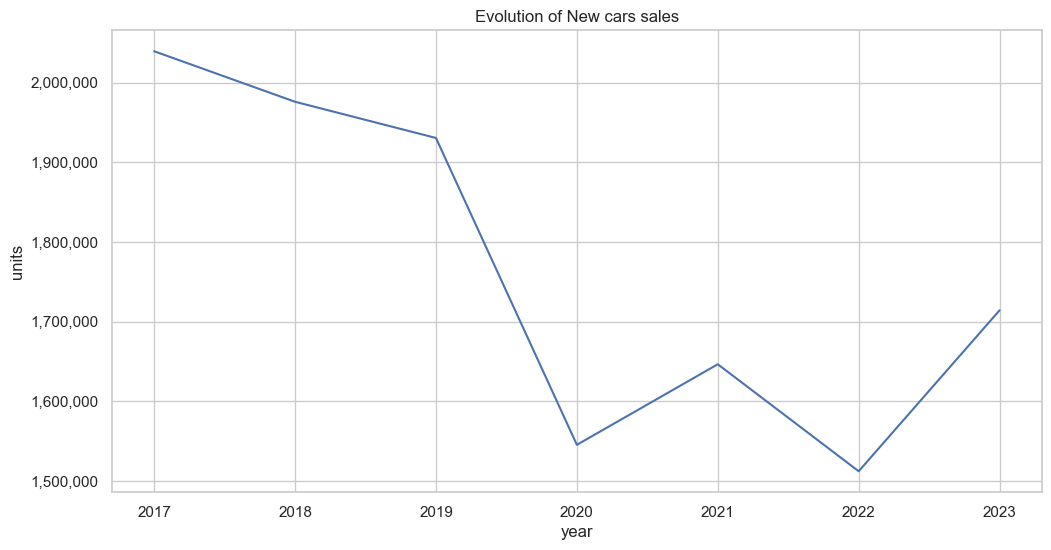

In [4]:
#yearly
grouped = df[['year', 'units']].groupby(['year']).sum()

fig, ax = plt.subplots(figsize=[12,6])
sns.lineplot(data=grouped, x='year', y='units', ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_title('Evolution of New cars sales')
plt.show()

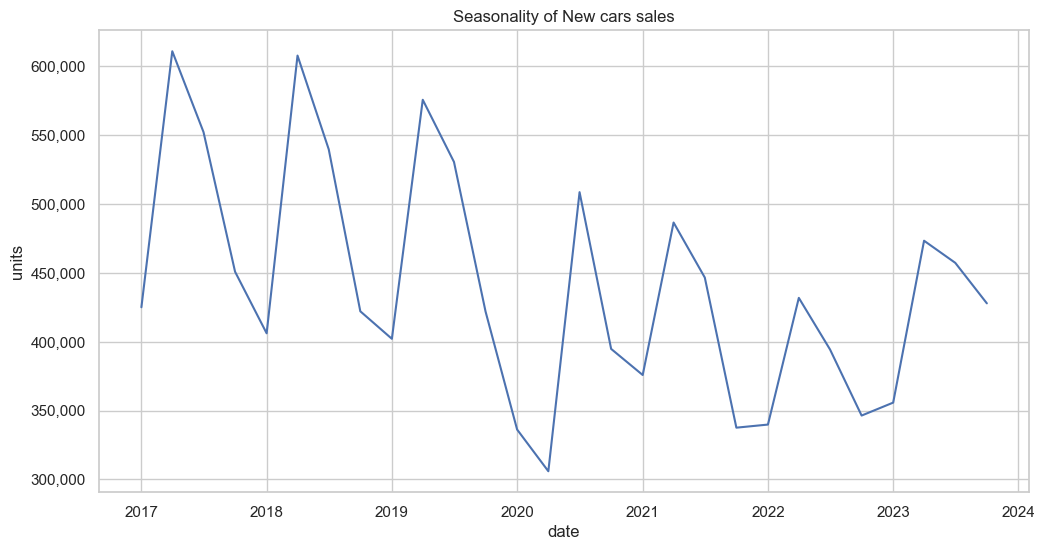

In [5]:
#quarterly

grouped = df[['date', 'units']].groupby(['date']).sum()

fig, ax = plt.subplots(figsize=[12,6])
sns.lineplot(data=grouped, x='date', y='units', ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_title('Seasonality of New cars sales')
plt.show()

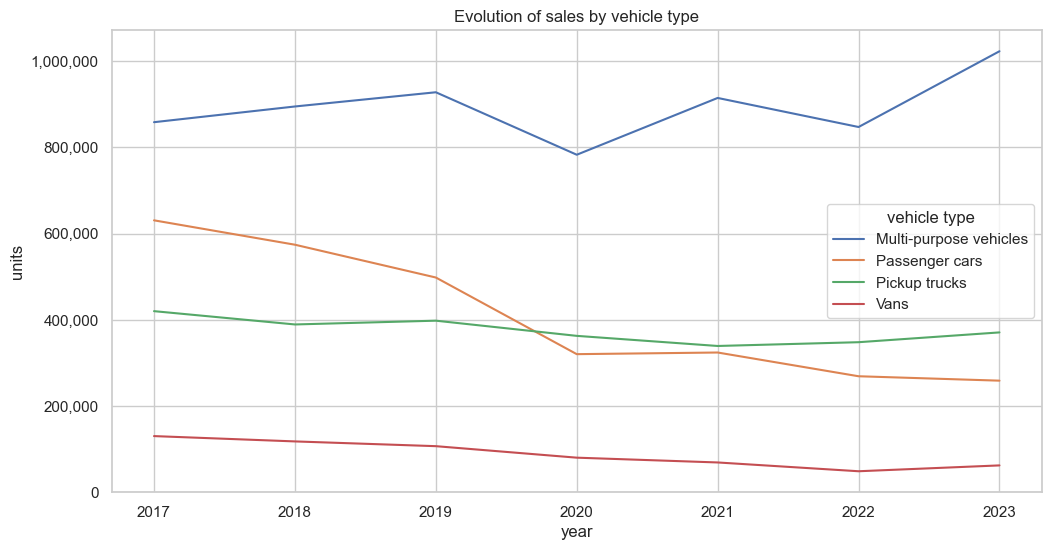

In [19]:
grouped = df[['year', 'vehicle type', 'units']].groupby(['year', 'vehicle type']).sum()

fig, ax = plt.subplots(figsize=[12,6])
sns.lineplot(data=grouped, x='year', y='units', hue='vehicle type', errorbar=None, ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_title( 'Evolution of sales by vehicle type')
plt.show()
fig.savefig('vehicule_type.jpg')

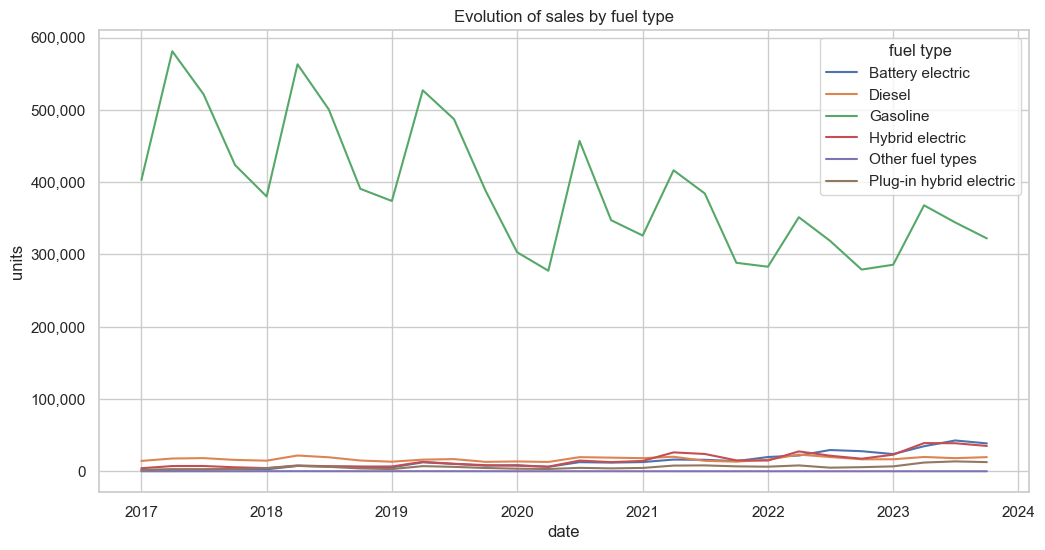

In [7]:
grouped = df[['date', 'fuel type', 'units']].groupby(['date', 'fuel type']).sum()

fig, ax = plt.subplots(figsize=[12,6])
sns.lineplot(data=grouped, x='date', y='units', hue='fuel type', errorbar=None, ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_title( 'Evolution of sales by fuel type')
plt.show()

<Axes: xlabel='year'>

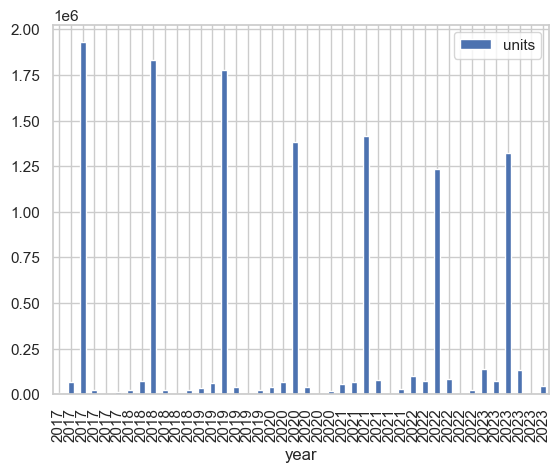

In [8]:
grouped = df[['year', 'fuel type', 'units']].groupby(['year', 'fuel type']).sum().reset_index()
grouped.plot(kind='bar', x='year', stacked=True)


<Axes: xlabel='year'>

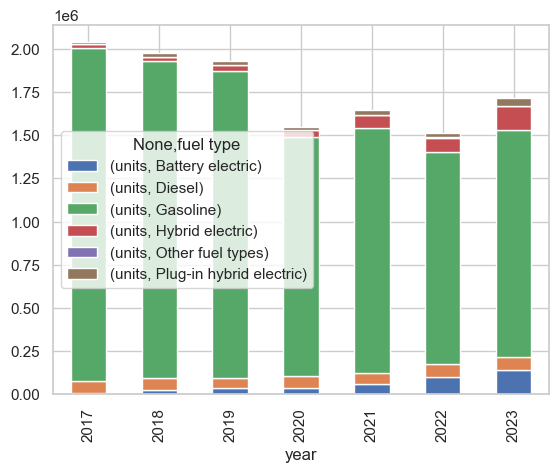

In [9]:
grouped = df[['year', 'fuel type', 'units']].groupby(['year', 'fuel type']).sum().reset_index()
piv_cols = ['fuel type']
piv_index = ['year']
piv = grouped.pivot(columns=piv_cols, index=piv_index)
piv.plot(kind='bar', stacked=True)


In [10]:
grouped = df[['year', 'fuel type', 'units']].groupby(['year', 'fuel type']).sum().reset_index()


In [11]:
crosstab = pd.crosstab(index=grouped['year'], columns=grouped['fuel type'], values=grouped['units'], aggfunc='sum', normalize="index", margins=False) * 100
#crosstab = pd.crosstab(index=grouped['year'], columns=grouped['fuel type'], normalize="index")
print(crosstab)
#df[['year', 'fuel type', 'units']].groupby(['year', 'fuel type']).sum().reset_index()
#piv_cols = ['fuel type']
#piv_index = ['year']
#piv = grouped.pivot(columns=piv_cols, index=piv_index)
#piv.plot(kind='bar', stacked=True)


fuel type  Battery electric  Diesel  Gasoline  Hybrid electric  \
year                                                             
2017                   0.45    3.23     94.62             1.18   
2018                   1.14    3.57     92.87             1.31   
2019                   1.84    3.06     92.03             1.99   
2020                   2.53    4.19     89.61             2.68   
2021                   3.57    4.00     85.96             4.82   
2022                   6.52    4.98     81.49             5.37   
2023                   8.14    4.31     77.01             7.91   

fuel type  Other fuel types  Plug-in hybrid electric  
year                                                  
2017                   0.00                     0.52  
2018                   0.01                     1.10  
2019                   0.01                     1.07  
2020                   0.00                     0.99  
2021                   0.00                     1.66  
2022                

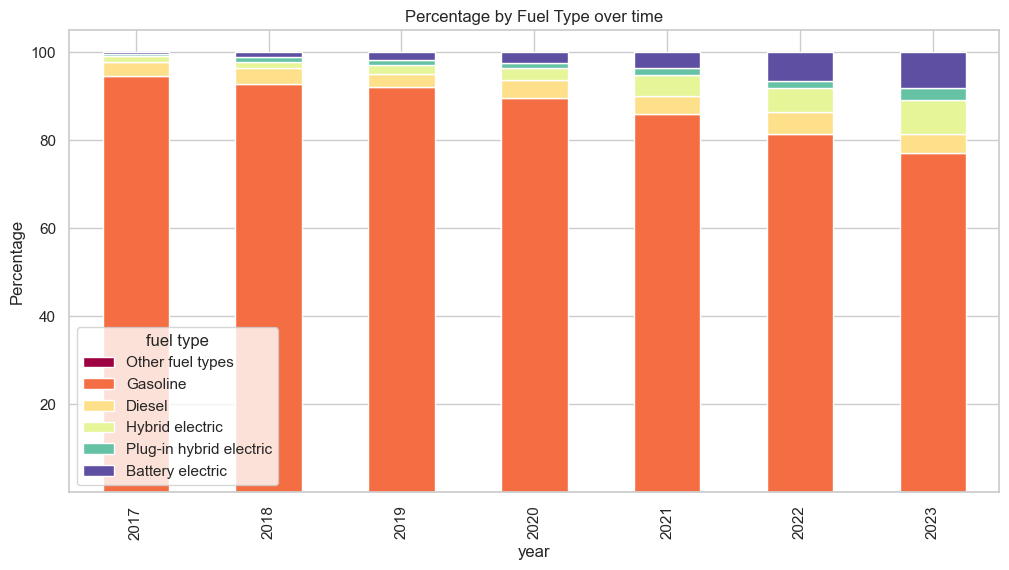

In [12]:
#order = ['Battery electric', 'Diesel', 'Hybrid electric', 'Other fuel types', 'Plug-in hybrid electric', 'Gasoline']
order = ['Other fuel types', 'Gasoline', 'Diesel', 'Hybrid electric', 'Plug-in hybrid electric', 'Battery electric']
colors = ['orange', 'brown', 'red', 'violet', 'blue', 'green']

#ax = crosstab[order].plot(kind='bar', stacked=True, colormap='BrBG')
fig, ax = plt.subplots(figsize=[12,6])
crosstab[order].plot(kind='bar', stacked=True, colormap=sns.color_palette("Spectral", as_cmap=True), ax=ax)


ax.set_title('Percentage by Fuel Type over time')
ax.set_ylabel('Percentage')
plt.show()

In [13]:
fig.savefig('yearly_fuel_type.jpg')